In [27]:
import pandas as pd
url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Auto.csv"
df = pd.read_csv(url)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
x=df['horsepower']
y=df['mpg']

In [29]:
# transform text data into numeric if it is number
# if it is non numeric values --> NaN
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')
df = df.dropna() # drop the raw that contains NaN (non numeric) values
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## Defining X and Y

In [30]:
import numpy as np
x = np.array(df['horsepower']).reshape(-1,1)
y = df['mpg']

## Validation Set Approach

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.5)

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.5)
reg = LinearRegression()
# fit the regressor from train 
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mean_squared_error(y_test, y_pred)

25.026847546359356

## Addining Hihger Degree Polynomial Terms

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly=PolynomialFeatures(degree=1,include_bias=False)

## Measuring Validation Set Error by varing polynomial Degree from 1 to 10

In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'mse')

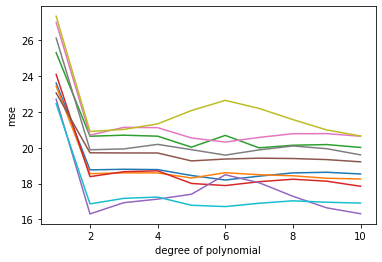

In [39]:
for k in range(10):
    mse=[]    
    for i in range(1,11):
        poly=PolynomialFeatures(degree=i,include_bias=False)
        x_temp = poly.fit_transform(x)
        x_train, x_test, y_train, y_test = train_test_split(x_temp,y, shuffle=True, test_size=0.5,random_state=k*2)
        reg = LinearRegression()
        reg.fit(x_train, y_train)
        y_pred = reg.predict(x_test)    
        mse.append(mean_squared_error(y_test, y_pred))
    plt.plot(np.arange(1,11),mse)
    #mse=[]
plt.xlabel('degree of polynomial')
plt.ylabel('mse')


Text(0, 0.5, 'mse')

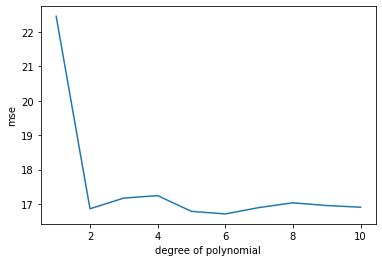

In [40]:
plt.plot(np.arange(1,11),mse)
plt.xlabel('degree of polynomial')
plt.ylabel('mse')

## K-fold Cross Validation

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score


In [42]:
x = np.array(df['horsepower']).reshape(-1,1)
y = df['mpg']
kfold = KFold(n_splits=10)
reg = LinearRegression()
-1*np.average(cross_val_score(reg,x,y,scoring='neg_mean_squared_error',cv=kfold))

27.439933652339874

Text(0, 0.5, 'mse')

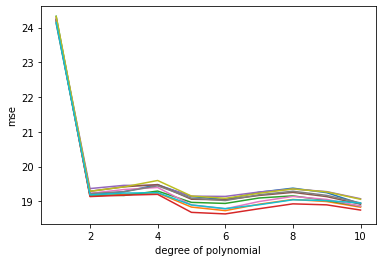

In [43]:
for k in range(10):
    mse=[]    
    for i in range(1,11):
        poly=PolynomialFeatures(degree=i,include_bias=False)
        x_temp = poly.fit_transform(x)
        kfold = KFold(n_splits=10, shuffle=True, random_state=k*2)
        reg = LinearRegression()        
        mse.append(-1*np.average(cross_val_score(reg,x_temp,y,scoring='neg_mean_squared_error',cv=kfold)))        
    plt.plot(np.arange(1,11),mse)
    mse=[]
plt.xlabel('degree of polynomial')
plt.ylabel('mse')

## LOOCV

In [44]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
reg = LinearRegression()
np.average(-1*cross_val_score(reg, x,y,scoring='neg_mean_squared_error',cv=loo))

24.231513517929226